In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Social_Network_Ads.xls")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X = df.iloc[:,2:4].values

In [7]:
X.shape

(400, 2)

In [8]:
y = df.iloc[:,-1].values
y.shape

(400,)

In [9]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
print(x_train.shape)
print(x_test.shape)

(320, 2)
(80, 2)


In [11]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# calculate value of k 
- Ist Method

In [12]:
np.sqrt(x_train.shape[0])

17.88854381999832

In [13]:
k = 17

In [15]:
# import the knn classifier from the sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k) # make an object of knn
# fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [17]:
y_pred = knn.predict(x_test)
print(y_pred)
print(y_pred.shape)

[0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1
 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 1 1 0 0 1 0]
(80,)


In [18]:
# import accuracy score class to compare y test with y_pred
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9625


In [20]:
# calcuate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[45  3]
 [ 0 32]]


# Second Method of computing K
- Trail and error method

In [21]:
accuracy = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))

In [23]:
len(accuracy)

25

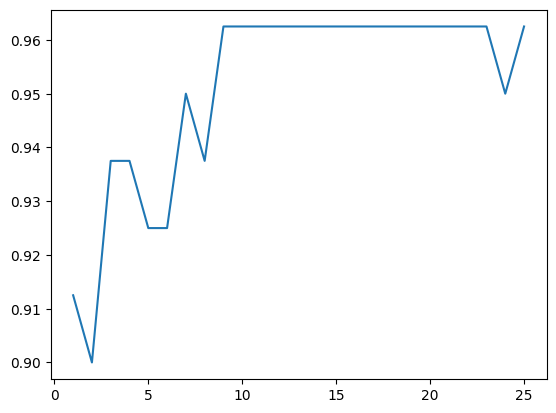

In [25]:
plt.plot(range(1,26),accuracy)
plt.show()

In [35]:
# do the same operation again this time k will be greater than 10
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9625


In [38]:
def predict_output():
    age = int(input("Enter the age : "))
    salary = int(input("enter the salary : "))
    x_new = np.array([[age],[salary]]).reshape(1,2)
    x_new  =scaler.transform(x_new)
    if knn.predict(x_new)[0] == 0:
        return 'Will not purchase'
    else:
        return 'Will PUrchase'

In [39]:
predict_output()

Enter the age :  34
enter the salary :  22


'Will not purchase'



1. Decision Boundary for Knn
1. What is Decision Boundary
In a classification problem with two or more classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two or more sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.

Important Points
We can draw decision boundary for all the classification algorithms including Neural networks
Decision boundary can be both linear(as in the case of SVM) or non-linear(as in the case of Decision tree classifier or Knn)
Decision boundaries are not always clear cut. That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.
For higher dimension problems the decision boundary acts as a hyperplane(for linear ones)


In mathematics, a Voronoi diagram is a partitioning of a plane into regions based on distance to points in a specific subset of the plane.


3. Steps to plot Decision Boundary for Knn(Assuming 2 input cols)
Train the classifier on the training set.
Create a uniform grid(with the help of Numpy Meshgrids) of points that densely cover the region of input space containing the training set.
Classify each point on the grid. Store the results in an array A, where Aij contains the predicted class for the point at row i, column j on the grid.
Plot the array as an image, where each pixel corresponds to a grid point and its color represents the predicted class. The decision boundary can be seen as contours where the image changes color.
Finally print out the training data with their respective color on the same contour
Step 2: Creating a Meshgrid

In [40]:
x = np.array([1,2,3])
y = np.array([4,5,6])
np.meshgrid(x,y)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])]

In [41]:
x = np.linspace(-40,40,100)
y = np.linspace(-50,50,90)
xx,xy = np.meshgrid(x,y)

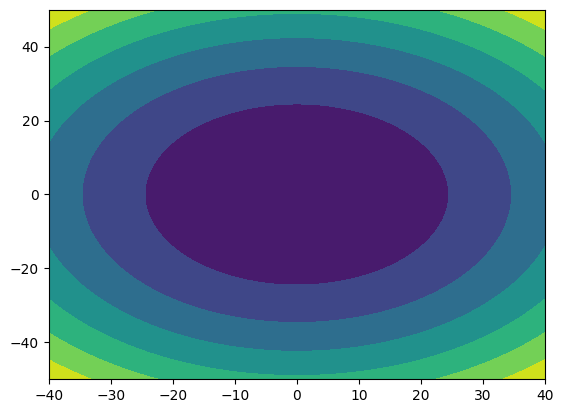

In [43]:
z = (xx ** 2) + (xy** 2)
plt.contourf(xx,xy,z)

In [44]:
x_train

array([[ 0.78770324,  0.26733667],
       [-0.72110356,  1.35580511],
       [ 2.10790919, -0.7034595 ],
       [-0.24960144, -0.49753304],
       [ 0.12760026,  1.88533029],
       [-0.81540399,  0.29675474],
       [ 0.31620111,  0.06141021],
       [-1.47550697,  0.3261728 ],
       [ 1.82500792, -1.29182081],
       [ 0.12760026, -0.82113176],
       [ 0.88200366, -1.46832921],
       [-1.47550697, -1.52716534],
       [-0.15530101,  1.41464124],
       [ 0.03329984,  0.29675474],
       [-1.28690612,  0.414427  ],
       [-0.43820229, -0.55636917],
       [-0.15530101, -1.08589435],
       [-0.15530101,  2.17951095],
       [ 0.88200366, -0.58578723],
       [ 0.03329984, -0.14451625],
       [-1.85270867,  0.35559087],
       [ 0.97630409, -1.02705822],
       [-0.81540399, -0.7917137 ],
       [-0.24960144, -0.58578723],
       [ 0.03329984, -0.26218851],
       [-0.43820229, -0.29160658],
       [ 0.03329984, -0.32102464],
       [-1.66410782,  0.35559087],
       [ 0.31620111,

In [46]:
a = np.arange(start = x_train[:,0].min()-1,stop = x_train[:,0].max(),step = 0.01)
b = np.arange(start = x_train[:,1].min()-1,stop = x_train[:,1].max(),step = 0.01)

In [47]:
a

array([-2.85270867e+00, -2.84270867e+00, -2.83270867e+00, -2.82270867e+00,
       -2.81270867e+00, -2.80270867e+00, -2.79270867e+00, -2.78270867e+00,
       -2.77270867e+00, -2.76270867e+00, -2.75270867e+00, -2.74270867e+00,
       -2.73270867e+00, -2.72270867e+00, -2.71270867e+00, -2.70270867e+00,
       -2.69270867e+00, -2.68270867e+00, -2.67270867e+00, -2.66270867e+00,
       -2.65270867e+00, -2.64270867e+00, -2.63270867e+00, -2.62270867e+00,
       -2.61270867e+00, -2.60270867e+00, -2.59270867e+00, -2.58270867e+00,
       -2.57270867e+00, -2.56270867e+00, -2.55270867e+00, -2.54270867e+00,
       -2.53270867e+00, -2.52270867e+00, -2.51270867e+00, -2.50270867e+00,
       -2.49270867e+00, -2.48270867e+00, -2.47270867e+00, -2.46270867e+00,
       -2.45270867e+00, -2.44270867e+00, -2.43270867e+00, -2.42270867e+00,
       -2.41270867e+00, -2.40270867e+00, -2.39270867e+00, -2.38270867e+00,
       -2.37270867e+00, -2.36270867e+00, -2.35270867e+00, -2.34270867e+00,
       -2.33270867e+00, -

In [48]:
b

array([-2.61541954, -2.60541954, -2.59541954, -2.58541954, -2.57541954,
       -2.56541954, -2.55541954, -2.54541954, -2.53541954, -2.52541954,
       -2.51541954, -2.50541954, -2.49541954, -2.48541954, -2.47541954,
       -2.46541954, -2.45541954, -2.44541954, -2.43541954, -2.42541954,
       -2.41541954, -2.40541954, -2.39541954, -2.38541954, -2.37541954,
       -2.36541954, -2.35541954, -2.34541954, -2.33541954, -2.32541954,
       -2.31541954, -2.30541954, -2.29541954, -2.28541954, -2.27541954,
       -2.26541954, -2.25541954, -2.24541954, -2.23541954, -2.22541954,
       -2.21541954, -2.20541954, -2.19541954, -2.18541954, -2.17541954,
       -2.16541954, -2.15541954, -2.14541954, -2.13541954, -2.12541954,
       -2.11541954, -2.10541954, -2.09541954, -2.08541954, -2.07541954,
       -2.06541954, -2.05541954, -2.04541954, -2.03541954, -2.02541954,
       -2.01541954, -2.00541954, -1.99541954, -1.98541954, -1.97541954,
       -1.96541954, -1.95541954, -1.94541954, -1.93541954, -1.92

In [49]:
xx,xy = np.meshgrid(a,b)

In [50]:
xx.shape

(498, 497)

In [51]:
xy.shape

(498, 497)

In [52]:
input_array = np.array([xx.ravel(),xy.ravel()]).T

In [54]:
labels = knn.predict(input_array)

In [55]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

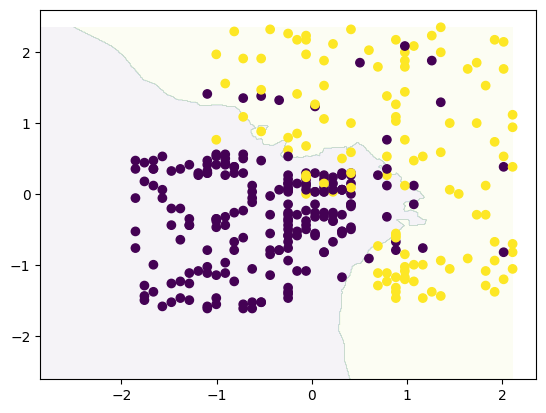

In [60]:
plt.contourf(xx,xy,labels.reshape(xx.shape),alpha = 0.05)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train)